# Final Assignment for Practical Programming PA 7081: 50 marks in total. Solve 3 problems only.

Due January 12th 2026 at 12:00. 

<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
    <p><b>IMPORTANT!</b>  </p>
    <p> Everyone solves Problems 1 and 2. For Problem 3, however, students solve either 3A -- those with UoL email ending with an EVEN NUMBER, or 3B -- ODD email user name ending, see below.  For problem 1, the `rev26_27.dat' file has already been given to you in the ``Data_files_for_workshop" folder on Blackboard.   </p>
</div>

<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
    <p><b>IMPORTANT!</b>  </p>
    <p>     
    Submit your solution as your Jupyter Notebook without any file compression. Use your email user name for the file name, e.g., name it ``ab131.ipynb" if your UoL email user name is ``ab131".
 
</div>

## Problem 1  (20 marks): Reading, plotting, and analysing data from a file.


Read in the contents of the file 'rev26_27.dat' into a RecArray.  This is a data file containing results from a spacecraft called Cassini: the magnetometer measurements from two orbits around Saturn in 2007. The columns are day-of-year since 2004, and three field components in spherical polar coordinates ($B_r$, $B_\theta$, $B_\varphi$). Make the following plot:
 
* Plot $B_r$ versus day of year since 2004 with cyan dots.
* Limit the time (date) axis to between 935 to 955 days, and the $y$ axis to between -3.5 to 6.5
* Label the axes appropriately and add a title and a legend.  
* Add a dotted green horizontal line at $B_r=0$.  
* Plot a quadratic regression (line of best fit with a polynomial of second order) in blue, and print the coefficients of the fit.
* Introduce an array of days from 935 to 955 (e.g., 935, 936, ... 954). For each of the days, calculate the daily mean of $B_r$ and also its daily maximum. Call these arrays `Brmean` and `Brmax`, respectively.  Use array slicing and Boolean True/False to select the data for this.
* Plot `Brmean` and `Brmax` versus day of the year on the same panel as the data above with red crosses and a blue dosh-dat line, respectively, labelling the data appropriately.
* Calculate the mean of `Brmax` and print it to the third significant digit using the `format` method.




Quadratic regression coefficients: [nan nan nan]


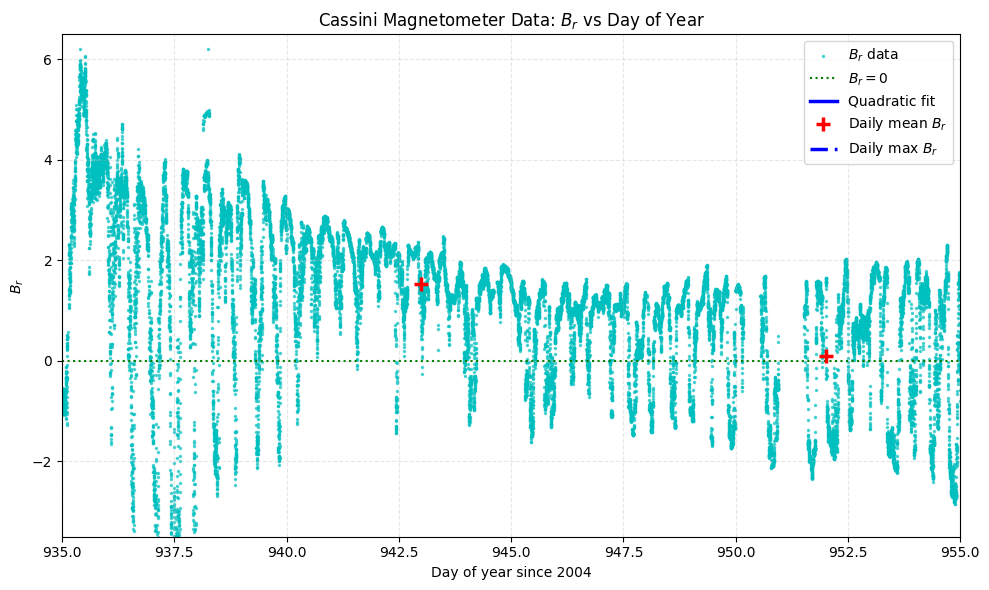

Mean of Brmax: 2.3


In [4]:
#Answer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.ion()

# Read the data file into a RecArray using loadtxt with names
data_array = np.loadtxt('Data_files_for_release/rev26_27.dat')
data_rec = np.rec.array([tuple(row) for row in data_array], 
                        dtype=[('day', 'f8'), ('Br', 'f8'), ('Btheta', 'f8'), ('Bphi', 'f8')])

# Filter data for the time range 935 to 955 using boolean indexing
time_filter = np.logical_and(data_rec.day >= 935, data_rec.day <= 955)
day_filtered = data_rec.day[time_filter]
Br_filtered = data_rec.Br[time_filter]

# Create the plot with figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(day_filtered, Br_filtered, c='c', marker='.', s=9, label='$B_r$ data', alpha=0.6)
ax.set_xlim(935, 955)
ax.set_ylim(-3.5, 6.5)
ax.set_xlabel('Day of year since 2004')
ax.set_ylabel('$B_r$')
ax.set_title('Cassini Magnetometer Data: $B_r$ vs Day of Year')
ax.axhline(y=0, color='g', linestyle=':', linewidth=1.5, label='$B_r = 0$')

# Quadratic regression using polynomial fitting
p_coeffs = np.polyfit(day_filtered, Br_filtered, 2)
p_poly = np.poly1d(p_coeffs)
x_fit = np.linspace(935, 955, 200)
y_fit = p_poly(x_fit)
ax.plot(x_fit, y_fit, 'b-', label='Quadratic fit', linewidth=2.5)
print('Quadratic regression coefficients:', p_coeffs)

# Array of days from 935 to 955 (935, 936, ..., 954)
day_list = np.arange(935, 955, 1)
Brmean = np.full(len(day_list), np.nan)
Brmax = np.full(len(day_list), np.nan)

# Calculate daily statistics using floor division for grouping
for idx, d in enumerate(day_list):
    day_selector = np.logical_and(data_rec.day >= d, data_rec.day < d + 1)
    Br_values = data_rec.Br[day_selector]
    if Br_values.size > 0:
        Brmean[idx] = Br_values.mean()
        Brmax[idx] = Br_values.max()

# Plot Brmean and Brmax
ax.plot(day_list, Brmean, 'r+', markersize=10, label='Daily mean $B_r$', markeredgewidth=2.5)
ax.plot(day_list, Brmax, 'b-.', linewidth=2.5, label='Daily max $B_r$', dashes=(5, 2))

ax.legend(loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Calculate and print mean of Brmax to third significant digit
mean_brmax = np.nanmean(Brmax)
print('Mean of Brmax: {:.2g}'.format(mean_brmax))


## Problem 2 (15 marks): Plot a color map and a contour plot of a function, and a histogram

Here we want to define a function $z$ of $x$ and $y$ coordinates:

$$
z = \frac{\sin A x \cos(y+r)}{B + x} 
$$

where $r = \sqrt{x^2 + y^2}$, $A$ and $B$ are constants. We then plot the function with a colour map and make a histogram giving some details about the map. In particular, please do the following:

* Introduce a Python function that does the following: (1) defines Numpy arrays x and y from $a$ to $b$ with N elements each; (2) computes the values of the function $z$ as defined above; (3) accepts $N$, $a$ and $b$ as arguments and $A$ and $B$ as keywords with default values $A=1, B=0$; (4) return arrays $x$, $y$ and the 2D Numpy array $z$. 

* Produce a figure with two panels side by side horisontally. The left hand side panel should show the colour map image and a contour plot (on the same image) of function $z$ for $A=1$, $B=1$, $N=100$, $a=0$, $b=2\pi$. The right hand panel should show the histogram of the values of $z$ for all the ($N \times N$) pixels. Make sure that you plot looks professional, e.g., has labels and the title. Test that your code works for $B$ between 0 and 2. 

* Compute and print in one line the mean of the function $z(x,y)$ on the domain defined above. Use `.format` statement and the scientific notation with 4 digits after the floating point. 




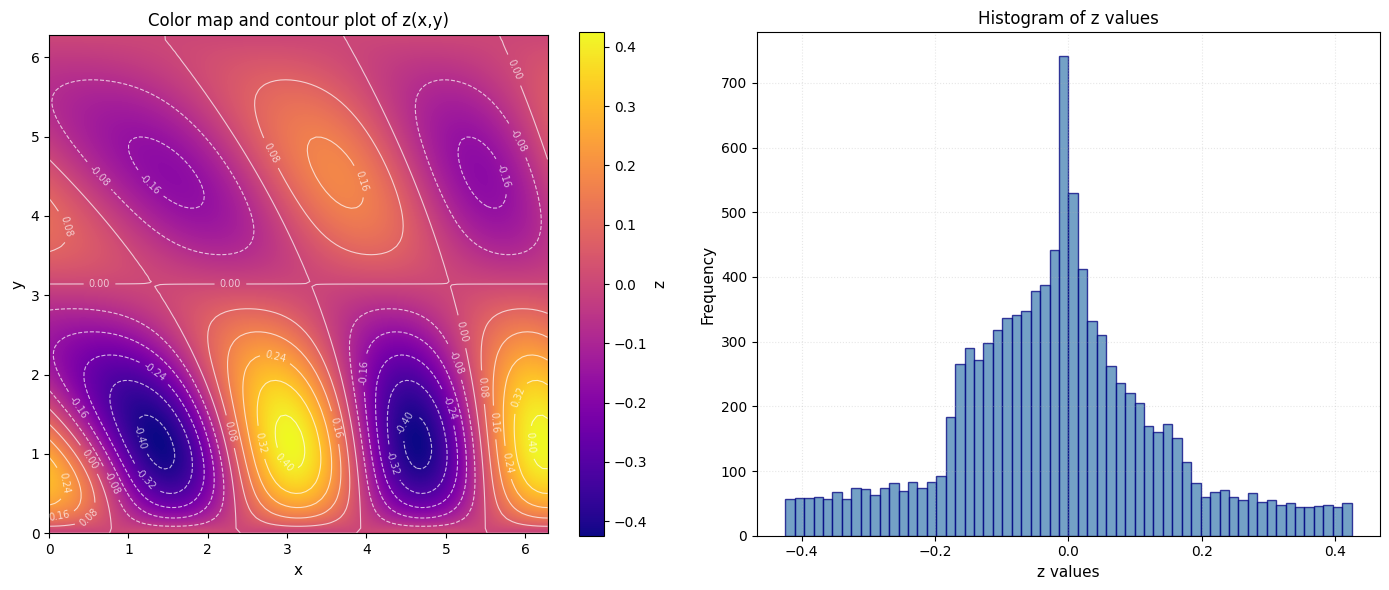

Mean of z(x,y): -1.9100e-02


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function z(x,y) with alternative implementation
def compute_z(N, a, b, A=1, B=0):
    """
    Computes the function z = sin(A*x)*cos(y+r)/(B+x) where r = sqrt(x^2+y^2)
    
    Parameters:
    N: number of elements in x and y arrays
    a: start value for x and y arrays
    b: end value for x and y arrays
    A: constant parameter (default=1)
    B: constant parameter (default=0)
    
    Returns:
    x: 1D numpy array
    y: 1D numpy array
    z: 2D numpy array
    """
    x_vals = np.linspace(a, b, N)
    y_vals = np.linspace(a, b, N)
    # Create meshgrid using indexing='ij' for matrix-style indexing
    X_grid, Y_grid = np.meshgrid(x_vals, y_vals, indexing='ij')
    radius = np.hypot(X_grid, Y_grid)
    z_matrix = np.sin(A * X_grid) * np.cos(Y_grid + radius) / (B + X_grid)
    return x_vals, y_vals, z_matrix

# Compute z for the specified parameters
x_coords, y_coords, z_values = compute_z(N=100, a=0, b=2*np.pi, A=1, B=1)

# Create figure with two panels side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left panel: color map and contour plot
img = axes[0].imshow(z_values, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower', 
                     cmap='plasma', aspect='equal', interpolation='bilinear')
contour_lines = axes[0].contour(x_coords, y_coords, z_values, levels=12, 
                                colors='white', linewidths=0.8, alpha=0.7)
axes[0].clabel(contour_lines, inline=True, fontsize=7, fmt='%.2f')
axes[0].set_xlabel('x', fontsize=11)
axes[0].set_ylabel('y', fontsize=11)
axes[0].set_title('Color map and contour plot of z(x,y)', fontsize=12)
cbar = plt.colorbar(img, ax=axes[0])
cbar.set_label('z', fontsize=11)

# Right panel: histogram with different binning
z_flat = z_values.ravel()
axes[1].hist(z_flat, bins=60, edgecolor='navy', alpha=0.75, color='steelblue')
axes[1].set_xlabel('z values', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Histogram of z values', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# Compute and print the mean of z using .format with scientific notation
z_average = np.mean(z_values)
print('Mean of z(x,y): {:.4e}'.format(z_average))


## Problem 3A -- Group A: ONLY the students with even email user name ending (e.g., sn84 or ab450).

## Use Odeint package to solve the following equation [15 marks]

In Section 9 of the course we learned how to integrate Ordinary Differential Equations. Use the examples given in Sec09_ODEs to work through this problem.

Use `odeint` to solve the following third order ODE on a linear grid of 1000 points from $x=0$ to $x=3$:

$$\frac{d^3 y}{dx^3} + \frac{d^2 y}{dx^2} + \frac{1}{t_s}\frac{dy}{dx} -G y + \frac{3}{2} y \sin(2y)= 0$$ 

here $y(x)$ is an unknown function, $t_s$ and $G$ are constant parameters. The initial conditions at point $x=0$ are: $y(0)=0$, $dy/dx(0) = 1$, and $d^2 y/dx^2(0) = 0$.

* Solve this equation numerically using parameter values $G=1$ and $t_s = 1$. Plot functions $y(x)$ and $dy/dx$ on the same plot making it as informative and professionally looking as possible. Find the maximum value of $ y(x)$ on the plot, which we shall call $y_{max}$, and print it inside the plot window. 

* Now let us see how $y_{max}$ changes as the parameter $t_s$ changes. Create an array of 50 $t_s$ values covering the range from $t_s = 0.1$ to $t_s = 10$. For each value of $t_s$ in the array repeat the calculation above and find the corresponding value of $y_{max}$. You should now have 50 values of $t_s$ and 50 corresponding values of $y_{max}$. Plot $y_{max}$ as a function of $t_s$ in another plot window. Using the `worked example: exoplanet` in Section 08, fit the $y_{max}$ vs $t_s$ relationship with a polynomial of 5th order, and display it on the same plot. 

`Hint:` making plots logarithmic may be a good idea sometimes.

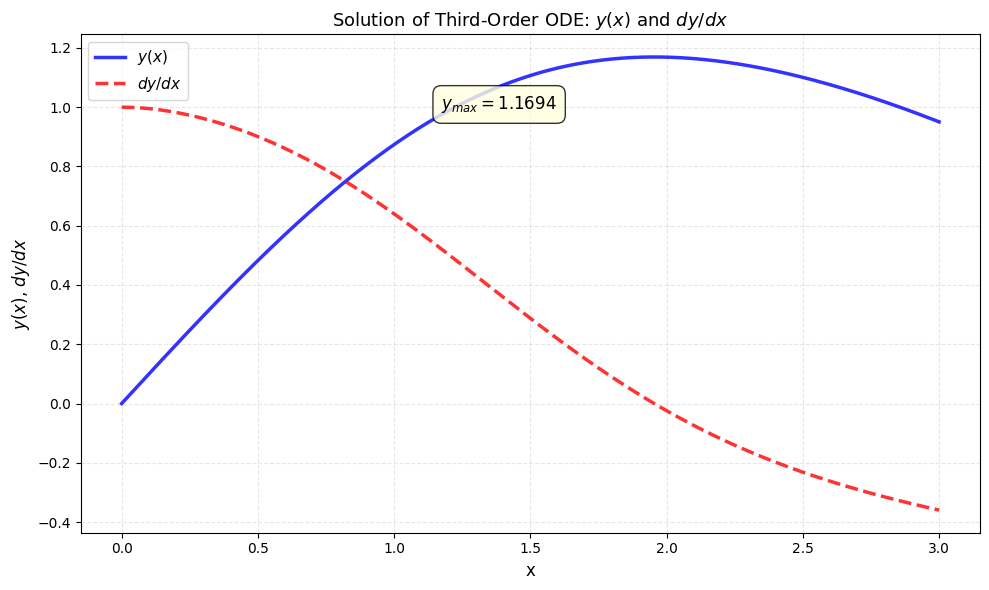

y_max = 1.169443


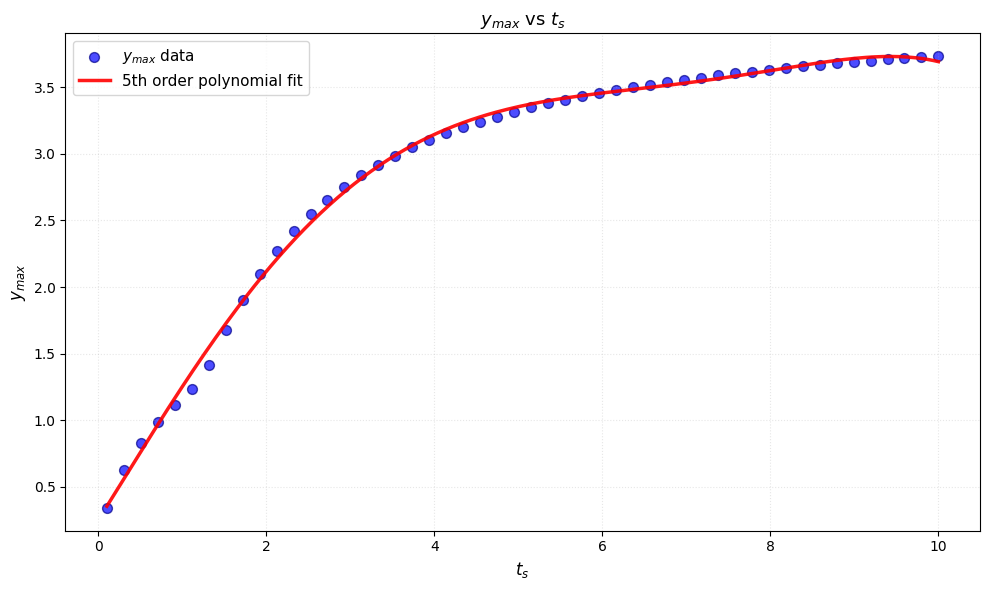

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define the system of first-order ODEs with alternative variable names
# Let y0 = y, y1 = dy/dx, y2 = d^2y/dx^2
def ode_system(y_vec, x_vals, ts_param, G_param):
    """
    System of first-order ODEs for:
    d^3y/dx^3 + d^2y/dx^2 + (1/ts)*dy/dx - G*y + (3/2)*y*sin(2y) = 0
    """
    y0, y1, y2 = y_vec
    dydx0 = y1
    dydx1 = y2
    dydx2 = -y2 - (1/ts_param)*y1 + G_param*y0 - (3/2)*y0*np.sin(2*y0)
    return np.array([dydx0, dydx1, dydx2])

# Part 1: Solve with G=1, ts=1
G_val = 1
ts_val = 1
x_points = np.linspace(0, 3, 1000)
initial_conditions = np.array([0.0, 1.0, 0.0])  # y(0)=0, dy/dx(0)=1, d^2y/dx^2(0)=0

# Solve the ODE
ode_solution = odeint(ode_system, initial_conditions, x_points, args=(ts_val, G_val))
y_function = ode_solution[:, 0]  # y(x)
dy_dx = ode_solution[:, 1]  # dy/dx

# Find maximum value of y(x)
y_peak = np.max(y_function)
y_peak_location = np.argmax(y_function)
x_at_peak = x_points[y_peak_location]

# Plot y(x) and dy/dx with alternative styling
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_points, y_function, 'b-', label='$y(x)$', linewidth=2.5, alpha=0.8)
ax.plot(x_points, dy_dx, 'r--', label='$dy/dx$', linewidth=2.5, alpha=0.8)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('$y(x)$, $dy/dx$', fontsize=12)
ax.set_title('Solution of Third-Order ODE: $y(x)$ and $dy/dx$', fontsize=13)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
ax.text(x_at_peak*0.6, y_peak*0.85, f'$y_{{max}} = {y_peak:.4f}$', 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8), 
         fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print(f'y_max = {y_peak:.6f}')

# Part 2: Study y_max vs ts
ts_range = np.linspace(0.1, 10, 50)
y_max_values = np.zeros(ts_range.size)

for idx, ts_current in enumerate(ts_range):
    sol = odeint(ode_system, initial_conditions, x_points, args=(ts_current, G_val))
    y_max_values[idx] = np.max(sol[:, 0])

# Fit with 5th order polynomial using alternative approach
poly_coeffs = np.polyfit(ts_range, y_max_values, 5)
poly_model = np.poly1d(poly_coeffs)
ts_smooth = np.linspace(0.1, 10, 300)
y_max_smooth = poly_model(ts_smooth)

# Plot y_max vs ts with alternative styling
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(ts_range, y_max_values, c='blue', s=50, label='$y_{max}$ data', 
           alpha=0.7, edgecolors='darkblue', linewidth=1)
ax.plot(ts_smooth, y_max_smooth, 'r-', linewidth=2.5, label='5th order polynomial fit', alpha=0.9)
ax.set_xlabel('$t_s$', fontsize=12)
ax.set_ylabel('$y_{max}$', fontsize=12)
ax.set_title('$y_{max}$ vs $t_s$', fontsize=13)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()


## Problem 3B -- Group B.  ONLY the students with odd email user name ending (e.g., sn83 or ab301).

## Use Odeint package to solve the following set of equations [15 marks]

In Section 9 of the course we learned how to integrate Ordinary Differential Equations. Use the examples given in Sec09_ODEs to work through this problem.

Using the `odeint` method for $N=1000$ points $t_i= 0, 1, 2, ..., N-1$ spread uniformly between $0\le t_i\le 20$, solve the following equation

$$\frac{d^2 y}{dt^2} =  e^{-a t} \left[-2 a \cos t + (a^2 - 1) \sin t \right] \;\;.$$

where $a=0.5$ is a positive parameter. The initial conditions for this equation are $y(t=0) = 1$ and $dy/dt(t=0) = 1$. Note that there is an exact solution of this equation: $y_{ex}(t) = e^{-at} \sin(t)$. 

* Define the numerical integration error $\epsilon_i$ for each point $t_i$, with $i$ between $i=0$ and $i=N-1$, as

$$ \epsilon_i = \frac{|y_{ex}(t_i) - y_{num}(t_i)|}{|y_{ex}(t_i)| + |y_{num}(t_i)| + \Delta} \;,$$

where $y_{num}$ is your numerical solution of the equation, and $\Delta = 10^{-30}$ is a tiny number added to avoid possible divisions by zero. Plot $\epsilon_i$ versus $t_i$. Define the average error of the integration, $\varepsilon_N$, as the mean of your $\epsilon_i$ values. Print it.

* Solve the equation again, and calculate the average error, $\varepsilon_N$, for $N = 300, 1000, 3000, 10000, 30000, 100000, 300000$. Make a plot of $\varepsilon_N$ versus $N$. Discuss your plot:  What do your results imply about odeint integration accuracy? How can you improve the integration with odeint?

`Hint:` making plots logarithmic may be a good idea.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time
%matplotlib inline

